In [1]:
# Import dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from scipy.stats import sem

In [2]:
# Import the California housing data set and get description
california_dataset = fetch_california_housing()

print(california_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
# Read California housing data into a Pandas dataframe
housing_data = pd.DataFrame(data=california_dataset.data,columns=california_dataset.feature_names)
housing_data['MEDV'] = california_dataset.target
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Create 25 samples, each with sample size of 20
num_samples = 25
sample_size = 20


In [5]:
# Calculate means
means = [np.mean(np.random.choice(housing_data['MEDV'],sample_size)) for i in range(num_samples)]
means

# Calculate standard error on means
standard_errors = [sem(np.random.choice(housing_data['MEDV'],sample_size)) for i in range(num_samples)]
standard_errors


[0.36050673949529194,
 0.19362683147854548,
 0.23128065258067898,
 0.26110212149199097,
 0.2690258434665368,
 0.29041784677734506,
 0.23410008993006207,
 0.3160329471543942,
 0.32256080499918716,
 0.2060251629368556,
 0.16711103147938874,
 0.2579258765211381,
 0.1793264338250807,
 0.2520019368659902,
 0.30614667227954984,
 0.14907553542804364,
 0.2587668074997865,
 0.2336151296808267,
 0.27526256835486324,
 0.19697920642331232,
 0.28328464297834505,
 0.3273662577549196,
 0.19745598576844783,
 0.3245581722579498,
 0.23187254751150183]

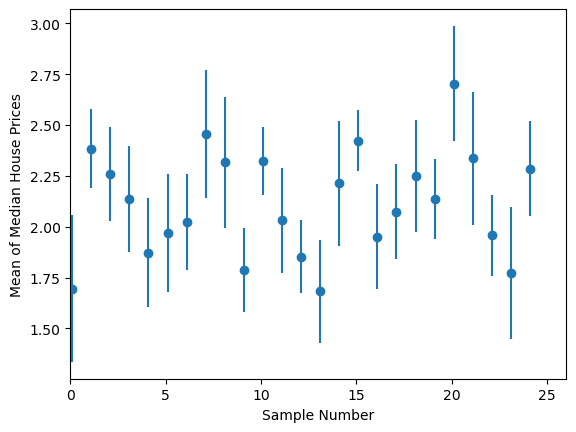

In [6]:
# Plot sample means with error bars
fig, ax = plt.subplots()
ax.errorbar(np.arange(0.1, 25, 1), means, standard_errors, fmt="o")
ax.set_xlim(0, 26)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean of Median House Prices")
plt.show()


In [7]:
# Calculate the range of SEM values
sem_range = np.arange(0, 100, 10)
print(f"the range of SEM values is: {sem_range}")


the range of SEM values is: [ 0 10 20 30 40 50 60 70 80 90]


In [8]:
# Determine which sample's mean is closest to the population mean
smallest_sem_index = np.argmin(standard_errors)
smallest_sem_value = standard_errors[smallest_sem_index]

print(f"The smallest SEM observed was {smallest_sem_value}")
print(f"The sample with the smallest SEM is sample {smallest_sem_index}")



The smallest SEM observed was 0.14907553542804364
The sample with the smallest SEM is sample 15


In [9]:
# Compare to the population mean
sample_mean = np.mean(np.random.choice(housing_data['MEDV'], sample_size))
population_mean = np.mean(housing_data['MEDV'])

print(f"The mean of the sample is {sample_mean}")
print(f"The mean of the population dataset is {population_mean}")



The mean of the sample is 2.2106009999999996
The mean of the population dataset is 2.068558169089147
